In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA

In [ ]:
#load and preprocess data
mnist = tf.keras.datasets.mnist
#choose pictures of number 2 and number 6
(train_images,train_labels), (test_images,test_labels) = mnist.load_data() #include all numbers from 0 to 9
index_train = np.where((train_labels ==2)|(train_labels ==6)) #include of numbers 3 and 5 in training data
index_test = np.where((test_labels ==2)|(test_labels ==6)) #index of numbers 3 and 5 in test data
train_images_26 = train_images[index_train]
train_images_26 = train_images_26.reshape((len(train_images_26), train_images_26[1].size))
#label of number 2: -1; label of number 6: +1
train_labels_26 = train_labels[index_train].astype('int')
test_images_26 = test_images[index_test]
test_images_26 = test_images_26.reshape((len(test_images_26), train_images_26[1].size))
test_labels_26 = test_labels[index_test].astype('int')
#change labels from '2' and '6' to '-1' and '+1'
train_labels_26[np.where(train_labels_26==2)]= 0
train_labels_26[np.where(train_labels_26==6)]= 1
test_labels_26[np.where(test_labels_26==2)]= 0
test_labels_26[np.where(test_labels_26==6)]= 1


11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
print(test_labels_26)

[0 1 1 ... 1 0 1]


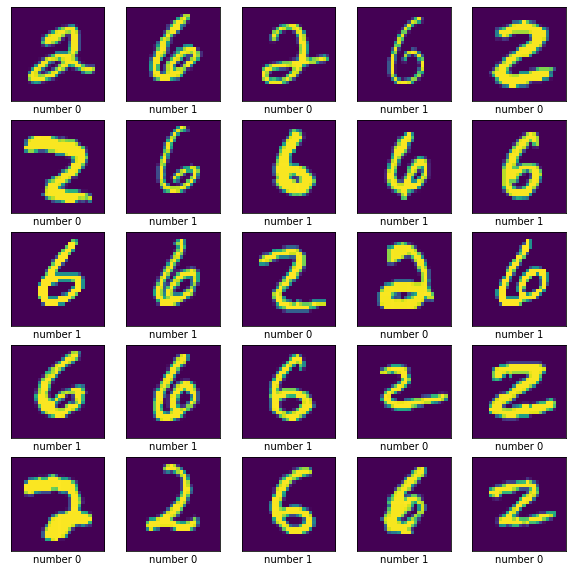

In [ ]:
#show the first 25 training data
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_images_26[i].reshape((28,28)),)
  plt.xlabel('number '+ str(train_labels_26[i]))
plt.show()

In [ ]:
#append dummy feature 1 to feature vectors, and then normalize
train_images_26_w_dummy = np.insert(train_images_26,784,1,axis=1)/255 
test_images_26_w_dummy = np.insert(test_images_26,784,1,axis=1)/255
train_images_26_w_dummy = train_images_26_w_dummy[range(1000)] #choose a subset of the entire training dataset
train_labels_26_w_dummy = train_labels_26[range(1000)]
#check the dimension, the feature vector of each sample shall be 785
print(train_images_26_w_dummy.shape)
print(train_labels_26_w_dummy.shape)
print(test_images_26_w_dummy.shape)
train_labels_26_w_dummy = np.reshape(train_labels_26_w_dummy,(train_labels_26_w_dummy.shape[0],1))
print(train_labels_26_w_dummy.shape)


(1000, 785)
(1000,)
(1990, 785)
(1000, 1)


In [ ]:
x_train = train_images_26_w_dummy
y_train = train_labels_26_w_dummy
x_test = test_images_26_w_dummy
y_test = np.reshape(test_labels_26, (test_labels_26.shape[0],1))

print(y_test.shape)
print(x_test.shape)
print(y_test)

(1990, 1)
(1990, 785)
[[0]
 [1]
 [1]
 ...
 [1]
 [0]
 [1]]


In [ ]:
class LogitRegression():
    def __init__(self,learning_rate,num_iterations):
        # Takes as an input hyperparameters: learning rate and the number of iterations.
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations

    def sigmoid(self,z):
        # Define a sigmoid function as σ(𝑧) =1/1+𝑒−𝑧
        #z = z.astype('float64')
        sig_x = 1/(1+np.exp(-z))
        return sig_x
    def cost(self,theta,x_train,y_train):
         mul_feature_weights = np.dot(x_train , theta)
         N = x_train.shape[0]
         hypothesis_func = self.sigmoid(mul_feature_weights)
         epsilon = 1e-5
         cost = (1/N) * np.sum((-y_train * np.log(hypothesis_func+epsilon) - (1 - y_train)*(np.log(1 - hypothesis_func+epsilon))))
         return cost
    
    def gradient_descent(self,theta,x_train,y_train):
         # Define current prediction y_hat for logistic regression as 𝑦̂ =σ(𝐰T𝐗+b)
         # Gradient descent is just the derivative of the loss function with respect to its weights. Thus
         mul_feature_weights = np.dot(x_train, theta)
         N = x_train.shape[0]
         y_pred = self.sigmoid(mul_feature_weights)
         y_pred = np.reshape(y_pred,(1000,1))
         print(y_pred)
         print("y_pred value is ", y_pred.shape)
         print("y_train value  value is ", y_train.shape)

         error = y_pred - y_train
         print("My error ka shape is ",error.shape)
         dW = (1/N)*(np.dot(np.transpose(x_train),(error)))
         print("x_train shape is ",x_train.shape)
         print("theta shape is ",theta.shape)

         #print(f"shape of dw is {dW.shape}")
         grad_values = {"grad_weight":dW}
         return grad_values

    def update_parameters(self,theta,x_train,y_train,learning_rate,num_iters,stop_limit=0.01):
        cost_values = []
        for i in range(num_iters):
          cost_val = self.cost(theta,x_train,y_train)
          if(i%100 == 0):
            print("My cost value is ",cost_val)
          cost_values.append(cost_val)
          gradient_values = self.gradient_descent(theta,x_train,y_train)
          if np.all(LA.norm(gradient_values["grad_weight"]) <= stop_limit):
            break
          diff= learning_rate*gradient_values["grad_weight"]
          print("diff shape is ",diff.shape)
          
          theta = np.reshape(theta,(theta.shape[0],1))
          theta = theta - diff
          # bias = bias   - learning_rate*gradient_values["grad_bias"]
          final_weights = {"weights":theta}
        return final_weights,gradient_values,cost_values

    def predict(self,x_vals,theta,gamma):
         # Return the predicted result in the binary form 𝑦̂=𝜎(𝐰T𝐗+b)= {+1if 𝜎(𝑧)≥0.50if 𝜎(𝑧)<0.5
         pred = np.dot(x_vals,theta)
         pred = pred.astype(float)
         pred = np.reshape(pred,(pred.shape[0],1))
         #  print("My predicted shape is ",pred.shape)
         #  print("My val of test shape is", x_vals_test.shape)
         sig_pred = self.sigmoid(pred)
         sig_pred = np.reshape(sig_pred,(sig_pred.shape[0],1))
         y_pred = np.zeros((x_vals.shape[0],1))
         for i in range(sig_pred.shape[0]):
           if sig_pred[i]<=gamma:
             sig_pred[i] = 0
           else:
             sig_pred[i] = 1
         return sig_pred
 
    def fit(self,x_train,y_train,x_test,y_test,learning_rate,num_iters):

        theta = np.random.uniform(0,1,785)
        # theta = np.reshape(theta,(theta.shape[0],1))

        weights_vals_updated,grads,cost_values = self.update_parameters(theta,x_train,y_train,learning_rate,num_iters)
        print(cost_values)
        return weights_vals_updated


      

In [ ]:
# theta = np.random.uniform(0,1,785)
# theta = np.reshape(theta,(theta.shape[0],1))
# theta.shape


In [ ]:
np.seterr(divide = 'ignore') 
#Create an object for Logistic Regression class with Learning rate and iterations as parameters
learning_rate = 0.5
iterations = 100000

model = LogitRegression(learning_rate, iterations)

# Train the model by calling the fit function
# N = x_train.shape[1]
updated_weights = model.fit(x_train,y_train,x_test,y_test,learning_rate,iterations)

Streaming output truncated to the last 5000 lines.
 [9.99999582e-01]
 [1.95309778e-08]
 [1.73114301e-02]
 [3.65277786e-02]
 [9.94392706e-01]
 [3.98903288e-07]
 [1.76079543e-05]
 [2.96404118e-02]
 [2.70890941e-07]
 [9.71927671e-01]
 [2.86094864e-10]
 [9.99841262e-01]
 [2.83112152e-03]
 [9.99953480e-01]
 [8.90709251e-08]
 [9.96875173e-01]
 [9.99942475e-01]
 [1.23553518e-04]
 [7.23482624e-06]
 [9.59011787e-01]
 [9.99451937e-01]
 [2.42900445e-01]
 [2.54985207e-01]
 [8.52794284e-01]
 [9.28762217e-08]
 [9.99931020e-01]
 [9.97102233e-01]
 [9.98181950e-01]
 [2.56497772e-09]
 [9.92091274e-01]
 [1.85096152e-05]
 [3.30550766e-05]
 [9.99847532e-01]
 [1.00354122e-06]
 [9.98287258e-01]
 [6.13973428e-07]
 [3.61525839e-06]
 [3.00299082e-02]
 [5.48477608e-08]
 [9.99745428e-01]
 [1.41196281e-06]
 [1.08789911e-08]
 [1.25522092e-09]
 [2.62136322e-06]
 [8.09713652e-01]
 [2.83918859e-03]
 [2.21089107e-05]
 [9.99681038e-01]
 [4.17266465e-02]
 [9.97853384e-01]
 [2.84595619e-05]
 [9.99911744e-01]
 [9.97444489e

In [ ]:
predicted_val= model.predict(x_train,updated_weights["weights"],0.5)
print(predicted_val)

[[0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.

In [ ]:
predicted_val.shape[0]

1000

In [ ]:
count=0
incorrect=0
for i in range(0,predicted_val.shape[0]):
  if (y_train[i]==predicted_val[i]):
    count=count+1
    
  else:
    incorrect= incorrect+1
print(count)
print(incorrect)
print(f"Training Accuracy is{(count/(count+incorrect))*100}")


993
7
Accuracy is99.3


#Test set

In [ ]:
predicted_test= model.predict(x_test,updated_weights['weights'])

#ROC

In [ ]:
predicted_val_test= model.predict(x_test,updated_weights["weights"],0.5)
print(predicted_val_test)

[[1.]
 [1.]
 [1.]
 ...
 [1.]
 [0.]
 [1.]]


In [ ]:
count_test=0
incorrect_test=0
for i in range(0,predicted_val_test.shape[0]):
  if (test_labels_26[i]==predicted_val_test[i]):
    count_test=count_test+1
  else:
    incorrect_test= incorrect_test+1
print(incorrect_test)
print(count_test)
print(f"Accuracy is{(count_test/(count_test+incorrect_test))*100}")

116
1874
Accuracy is94.17085427135679


In [ ]:
gamma_array = np.arange(0.1,1,0.1)
gamma_array

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [ ]:
rate = []
for i in gamma_array:
  predicted_val_test= model.predict(x_test,updated_weights["weights"],i)

  true_positive=0
  true_negative=0
  false_positive=0
  false_negative=0

  for i in range(0,predicted_test.shape[0]):
    if ((test_labels_26[i]==1) and (predicted_val_test[i]==1)):
      true_positive= true_positive+1
    elif((test_labels_26[i]==0)and (predicted_val_test[i]==0)):
      true_negative=true_negative+1
    elif((test_labels_26[i]==0)and (predicted_val_test[i]==1)):
      false_positive=false_positive+1
    elif((test_labels_26[i]==1)and (predicted_val_test[i]==0)):
      false_negative=false_negative+1
  # print(f"True positive values = {true_positive}\n")
  # print(f"True negative values = {true_negative}\n")
  # print(f"False positive values = {false_positive}\n")
  # print(f"False negative values = {false_negative}\n")
  TPR= (true_positive/(true_positive+false_negative))*100
  FPR= (false_positive/(false_positive+true_negative))*100
  print(f"True positive rate (TPR) is = {TPR}\n")
  print(f"False positive rate (FPR) is = {FPR}\n")
  rate.append([TPR,FPR])
print(f"rate is {rate}")

True positive rate (TPR) is = 99.06054279749478

False positive rate (FPR) is = 7.073643410852713

True positive rate (TPR) is = 98.64300626304802

False positive rate (FPR) is = 5.62015503875969

True positive rate (TPR) is = 98.32985386221294

False positive rate (FPR) is = 5.038759689922481

True positive rate (TPR) is = 98.01670146137788

False positive rate (FPR) is = 4.651162790697675

True positive rate (TPR) is = 97.28601252609603

False positive rate (FPR) is = 4.263565891472868

True positive rate (TPR) is = 96.76409185803759

False positive rate (FPR) is = 3.875968992248062

True positive rate (TPR) is = 95.4070981210856

False positive rate (FPR) is = 3.2945736434108532

True positive rate (TPR) is = 93.94572025052193

False positive rate (FPR) is = 2.810077519379845

True positive rate (TPR) is = 90.39665970772442

False positive rate (FPR) is = 2.3255813953488373

rate is [[99.06054279749478, 7.073643410852713], [98.64300626304802, 5.62015503875969], [98.32985386221294, 5

In [ ]:
rate[0]

[99.06054279749478, 7.073643410852713]

In [ ]:
gamma_array[0]

0.1

In [ ]:
rate[0][1]

7.073643410852713

In [ ]:
tpr_array=[]
fpr_array=[]
for j in range(len(rate)):
  tpr_array.append(rate[j][0])
  fpr_array.append(rate[j][1])

print(f"Tpr list = {tpr_array}")
print(f"Fpr list = {fpr_array}")

Tpr list = [99.06054279749478, 98.64300626304802, 98.32985386221294, 98.01670146137788, 97.28601252609603, 96.76409185803759, 95.4070981210856, 93.94572025052193, 90.39665970772442]
Fpr list = [7.073643410852713, 5.62015503875969, 5.038759689922481, 4.651162790697675, 4.263565891472868, 3.875968992248062, 3.2945736434108532, 2.810077519379845, 2.3255813953488373]


Text(0.5, 1.0, 'ROC')

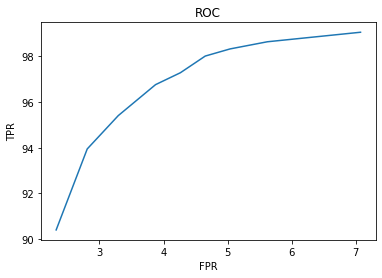

In [ ]:
plt.plot(fpr_array,tpr_array)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC")